## 11.2 Exercise: Building a CNN Image Classifier

In [2]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

[nltk_data] Downloading package wordnet to /Users/Robyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
conda install -c conda-forge keras conda install -c

usage: conda install [-h] [--revision REVISION] [-n ENVIRONMENT | -p PATH]
                     [-c CHANNEL] [--use-local] [--override-channels]
                     [--repodata-fn REPODATA_FNS] [--strict-channel-priority]
                     [--no-channel-priority] [--no-deps | --only-deps]
                     [--no-pin] [--copy] [-C] [-k] [--offline] [-d] [--json]
                     [-q] [-v] [-y] [--download-only] [--show-channel-urls]
                     [--file FILE] [--force-reinstall]
                     [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                     [-m] [--clobber] [--dev]
                     [package_spec [package_spec ...]]
conda install: error: argument -c/--channel: expected one argument

Note: you may need to restart the kernel to use updated packages.


In [14]:
# First I will upgrade my pip
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 3.1 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Next I will use pip to install tensorflow
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.7/961.7 KB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 3.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [16]:
# I will now import Keras
import keras

In [17]:
# Last I will import mnist and others from keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

## Step 1: Load the MNIST data set

In [18]:
## Load the MNIST data set with the use of mnist from keras
Mnist_Data = mnist.load_data()
Mnist_Data

11501568/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

## Step 2: Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

In [239]:
# First I will split my data into test and train data 
(X_train, Y_train), (X_test, Y_test) = Mnist_Data

In [240]:
# Next I will print the shape of both my training and test vector datas
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


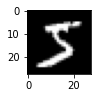

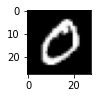

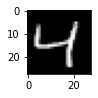

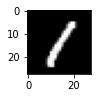

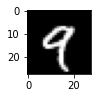

In [241]:
# Next I will display the first five images for the training data set 
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [242]:
# I will set the color channel value to be first and set the seed
K.set_image_data_format("channels_last")
np.random.seed(0)

In [243]:
# First I will set my image information
Channel = 1
height = 28
width = 28

In [244]:
# Next I will reshape my training image data into features
X_train = X_train.reshape(X_train.shape[0], height, width, Channel)

In [245]:
# I will now reshape my test data into features
X_test = X_test.reshape(X_test.shape[0], height, width, Channel)

In [246]:
# I will now rescale my pixel intensity to be between 0 and 1 as shown in the book
feature_train = X_train / 255
feature_test = X_test / 255

In [247]:
from keras.utils import np_utils
# I will now use one-hot encode on the y train and test which is our target
Target_train = np_utils.to_categorical(Y_train, 10)
Target_test = np_utils.to_categorical(Y_test, 10)
number_of_class = Target_test.shape[1]

In [248]:
# I will now start a neural network
network = Sequential()

In [250]:
# Next I will start a neural network and add convolutional layers
network.add(Conv2D(filters=64, kernel_size=(5,5), 
                   input_shape=(height, width, Channel), activation='relu'))

In [251]:
# Next I will add pooling layer, drop layer, and flatten input
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.5))
network.add(Flatten())

In [252]:
# Next I will add fully connected layer with ReLU activation function and dropout layer
network.add(Dense(128, activation="relu"))
network.add(Dropout(0.5))

In [253]:
# I will now fully add the connected layer with a softmax activation function
network.add(Dense(number_of_class, activation="softmax"))

In [254]:
# Next I will compile the neural network with the cross entropy,
# root mean square propagation, and accuracy performance metric
network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [235]:
# I will now use one-hot encode on the y train and test which is our target
Target_train = np_utils.to_categorical(Y_train, 10)
Target_test = np_utils.to_categorical(Y_test, 10)
number_of_class = Target_test.shape[1]

In [255]:
# Next I wil train my neural network with the features, target, number of epochs, and the number of observations

network.fit(feature_train, Target_train, epochs=2, batch_size=1000, verbose=0, validation_data=(feature_test, Target_test))

## Step 3: Build and train a Keras CNN classifier on the MNIST training set.

In [256]:
# First I will compile my model
network.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [257]:
# First I will import some needed
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [258]:
# Next I will prevent overfitting and cleaning of my images
train_arg = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)

In [259]:
# Next I will train my classifier on the mnist training and test sets
train_mnist = train_arg.flow(feature_train, Target_train, batch_size=64)
test_mnist = train_arg.flow(feature_test, Target_test, batch_size=64)

In [260]:
# Next I will print the shape of both my training and test vector datas
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [261]:
# Next I will print the shape of both my training and test vector datas
print('feature_X_train: ' + str(feature_train.shape))
print('Target_Y_train: ' + str(Target_train.shape))
print('feature_X_test:  '  + str(feature_test.shape))
print('Target_Y_test:  '  + str(Target_test.shape))

feature_X_train: (60000, 28, 28, 1)
Target_Y_train: (60000, 10)
feature_X_test:  (10000, 28, 28, 1)
Target_Y_test:  (10000, 10)


In [262]:
network.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                     

In [263]:
# Create a Keras CNN classifier on the MNIST training set
Fit_mnist = network.fit(train_mnist, epochs = 2, verbose=0, 
                        steps_per_epoch = feature_train.shape[0] // 64)

In [264]:
# I will now fit the Keras CNN classifier on the MNIST model with test and train data
Fit_mnist_two = network.fit_generator(train_mnist, epochs = 2, verbose=0, steps_per_epoch = feature_train.shape[0] // 64, validation_data = test_mnist, validation_steps = feature_test.shape[0] // 64)

## Step 4: Report the test accuracy of your model.

In [266]:
from keras.utils.vis_utils import plot_model
# First I will plot the CNN model
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


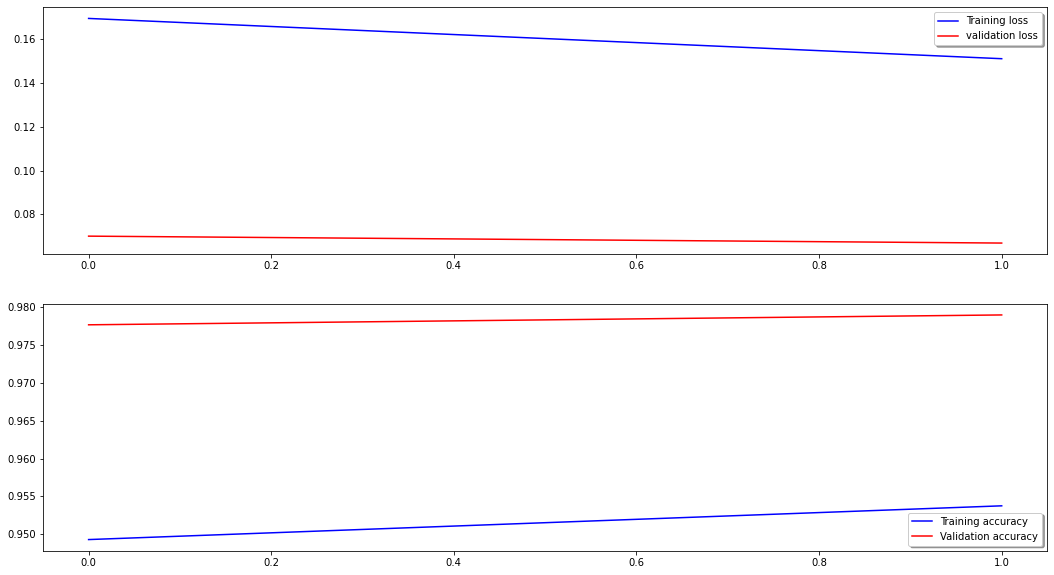

In [280]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(Fit_mnist_two.history['loss'], color='b', label="Training loss")
ax[0].plot(Fit_mnist_two.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(Fit_mnist_two.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(Fit_mnist_two.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [300]:
# Next I will print the accuracy of the model
import tensorflow as tf
metric = tf.keras.metrics.Accuracy()
metric.update_state(updated_target_test, updated_y_pred)
metric.result().numpy()

0.9885

As seen above the accuracy of my model is 98.85%

## Step 5: Display a confusion matrix on the test set classifications.

In [281]:
# First I will set my figure
fig_matrix = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

In [282]:
# Next I will create my y_pred with my network and predict from my feature_test
y_pred = network.predict(feature_test)

In [283]:
# I will now decode my predicted y_pred
updated_y_pred = np.argmax(y_pred, 1) 
updated_target_test = np.argmax(Target_test, 1)

In [285]:
from sklearn.metrics import confusion_matrix
# I will now create my confusion matrix from my updated_y_pred and updated_target_test
updated_matrix = confusion_matrix(updated_target_test, updated_y_pred)

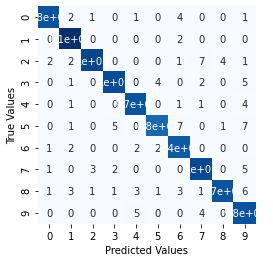

In [286]:
# I will now plot my confusion matrix
sns.heatmap(updated_matrix.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

As seen above the confusion matrix that has been created on the test set shows that as the predictive value rases so does the true value.

## Step 6: Summarize your results.

In this report I used MNIST to identify digits that is gathered from a dataset of thousands of images and the goal was to build and train a Keras CNN classifier on the MNIST to report the test accuracy of your model and create a confusion matrix on the test set classifications. As seen in this report we have learned that our accuracy is 99.85% for the model and the use of a confusion matrix can show us what our models weaknesses are and if our predicte values matched up with the true values of the model. Overall I felt as if this model was very accurate in determining if the true value was what was predicted. 